In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
ads_data = pd.read_csv('/home/jupyter-s.volosjuk-15/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')

In [3]:
ads_clients_data = pd.read_csv('/home/jupyter-s.volosjuk-15/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')

In [4]:
ads_data.head(3)

date                 time event platform   ad_id  client_union_id  \
0  2019-04-01  2019-04-01 00:00:48  view  android   45061            34734   
1  2019-04-01  2019-04-01 00:00:48  view      web  121288           121288   
2  2019-04-01  2019-04-01 00:01:03  view  android  102737           102535   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410

In [5]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   date                   1000000 non-null  object 
 1   time                   1000000 non-null  object 
 2   event                  1000000 non-null  object 
 3   platform               1000000 non-null  object 
 4   ad_id                  1000000 non-null  int64  
 5   client_union_id        1000000 non-null  int64  
 6   campaign_union_id      1000000 non-null  int64  
 7   ad_cost_type           1000000 non-null  object 
 8   ad_cost                1000000 non-null  float64
 9   has_video              1000000 non-null  int64  
 10  target_audience_count  1000000 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 83.9+ MB


In [6]:
ads_data['date'] = pd.to_datetime(ads_data.date)
ads_data['time'] = pd.to_datetime(ads_data.time)

In [7]:
# Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. 
# Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет
# строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

In [8]:
events_data = ads_data.groupby(['ad_id', 'event'], as_index=False) \
            .agg({'time': 'count'}) \
            .pivot(index='ad_id', columns='event', values='time') \
            .reset_index() \
            


In [9]:
events_data.click = events_data.click.fillna(0)

In [10]:
events_data.head(3)

event  ad_id  click   view
0          2    1.0  101.0
1          3    3.0  184.0
2       1902    1.0   41.0

In [11]:
events_data.click.mean().round(0)

113.0

In [12]:
events_data.view.mean().round(0)

932.0

In [13]:
# Давайте посмотрим на распределение показов объявлений!

# По оси x – число показов
# По оси y – доля объявлений с такими показами
# Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. 


In [14]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


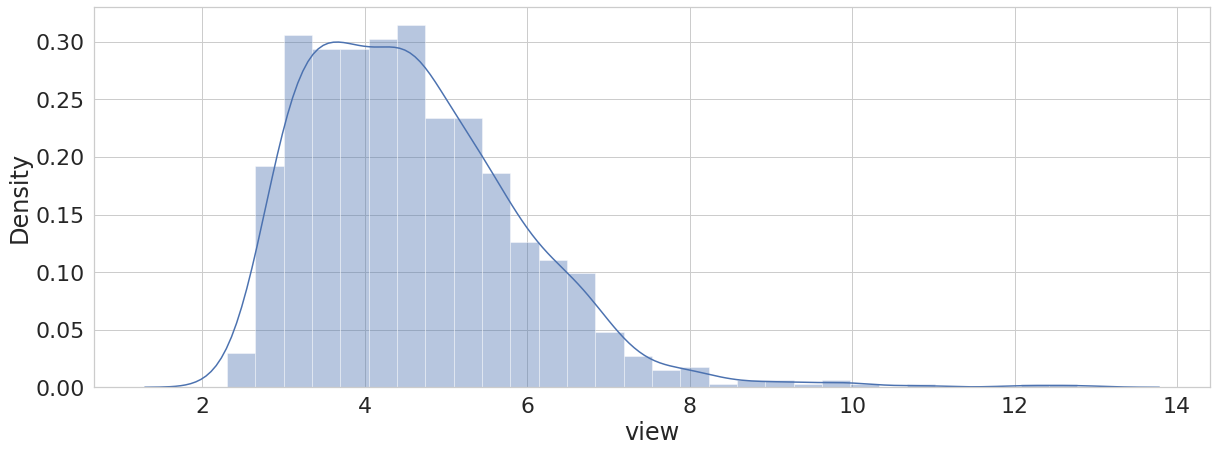

In [63]:
sns.distplot(np.log(events_data.view))

In [16]:
# Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, 
# у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату
# с окном в 2 элемента.

# Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [17]:
ads_data.head()

date                time event platform   ad_id  client_union_id  \
0 2019-04-01 2019-04-01 00:00:48  view  android   45061            34734   
1 2019-04-01 2019-04-01 00:00:48  view      web  121288           121288   
2 2019-04-01 2019-04-01 00:01:03  view  android  102737           102535   
3 2019-04-01 2019-04-01 00:01:03  view  android  107564           106914   
4 2019-04-01 2019-04-01 00:01:09  view  android    4922               37   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410  
3             107564          CPM    217.3          0                  62711  
4               4400          CPC     60.1          0                1183501

In [18]:
day_view = ads_data.query('event == "view"').groupby(['ad_id', 'date'], as_index=False ).agg({'time': 'count'})

In [19]:
day_view

ad_id       date  time
0          2 2019-04-01    83
1          2 2019-04-02    18
2          3 2019-04-01   158
3          3 2019-04-02    26
4       1902 2019-04-03    34
...      ...        ...   ...
1926  122023 2019-04-05    15
1927  122031 2019-04-05   119
1928  122031 2019-04-06    19
1929  122078 2019-04-03    36
1930  122078 2019-04-04     6

[1931 rows x 3 columns]

In [73]:
mean_df = day_view.groupby('date').agg({'time': 'mean'})

In [74]:
mean_df

time
date                  
2019-04-01  154.482270
2019-04-02  137.786982
2019-04-03  163.952778
2019-04-04  675.901720
2019-04-05  919.109677
2019-04-06  277.122727

In [75]:
rol_df = day_view.groupby('date').agg({'time': 'mean'}).rolling(2).mean()

In [76]:
rol_df

time
date                  
2019-04-01         NaN
2019-04-02  146.134626
2019-04-03  150.869880
2019-04-04  419.927249
2019-04-05  797.505699
2019-04-06  598.116202

In [77]:
rol_df.loc['2019-04-06'].round()

time    598.0
Name: 2019-04-06 00:00:00, dtype: float64

In [78]:
# Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения 
# просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

# Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
# Дни, в которых скользящее среднее равно NaN, не учитываем. 

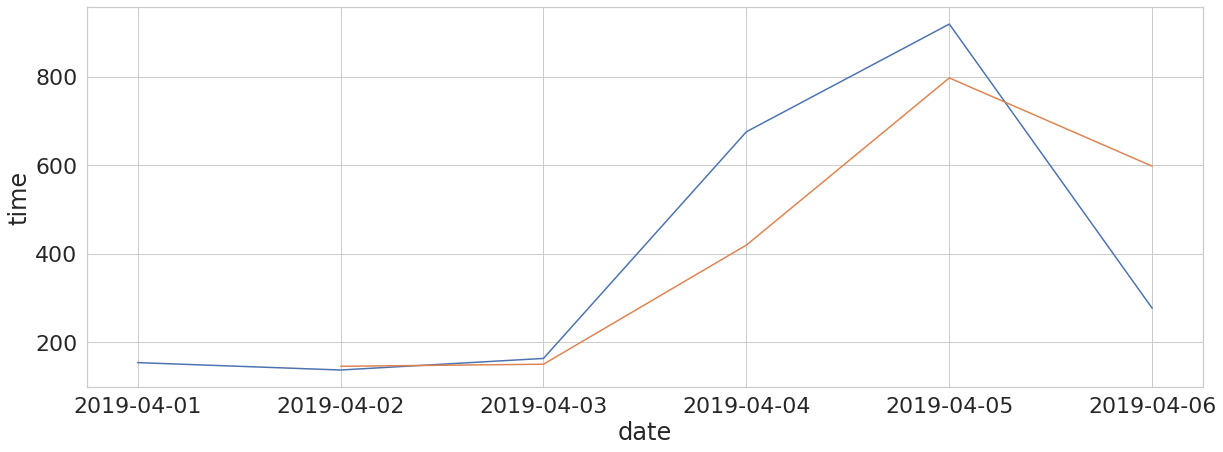

In [79]:
sns.lineplot(data=mean_df.time)
sns.lineplot(data=rol_df.time)

In [82]:
(mean_df.time - rol_df.time).abs().idxmax()

Timestamp('2019-04-06 00:00:00')

In [27]:
# Ну а теперь найдём проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена 
# самая большая по модулю аномалия. То есть нужно переиспользовать предыдущий датафрейм и найти среди данных рекламы в тот день 
# объявление с наибольшим или наименьшим числом показов.Потом напишите функцию, которая будет искать такое объявление в датасете.

In [28]:
ads_data.head(3)

date                time event platform   ad_id  client_union_id  \
0 2019-04-01 2019-04-01 00:00:48  view  android   45061            34734   
1 2019-04-01 2019-04-01 00:00:48  view      web  121288           121288   
2 2019-04-01 2019-04-01 00:01:03  view  android  102737           102535   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410

In [87]:
day_06 = ads_data.query('date == "2019-04-06"') \
        .query('event == "view"') \
        .groupby('ad_id') \
        .agg({'time': 'count'}) 


In [88]:
day_06

time
ad_id       
2468       7
4365      22
6338      56
10008     29
10012     29
...      ...
119161    14
119175    27
121309   111
121820    11
122031    19

[220 rows x 1 columns]

In [89]:
day_06.idxmax()

time    112583
dtype: int64

In [33]:
# Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного 
# клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

In [34]:
ads_data.head(3)

date                time event platform   ad_id  client_union_id  \
0 2019-04-01 2019-04-01 00:00:48  view  android   45061            34734   
1 2019-04-01 2019-04-01 00:00:48  view      web  121288           121288   
2 2019-04-01 2019-04-01 00:01:03  view  android  102737           102535   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410

In [35]:
ads_clients_data.head(3)

date  client_union_id  community_id create_date
0  2020-05-07                1    -130371893  2018-12-24
1  2020-05-07                2    -130304626  2019-02-10
2  2020-05-07                3    -130462599  2019-01-25

In [36]:
ads_clients_data.create_date = pd.to_datetime(ads_clients_data.create_date)
ads_clients_data.date = pd.to_datetime(ads_clients_data.date)

In [37]:
ads_clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122078 entries, 0 to 122077
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             122078 non-null  datetime64[ns]
 1   client_union_id  122078 non-null  int64         
 2   community_id     122078 non-null  int64         
 3   create_date      122078 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 3.7 MB


In [38]:
df = ads_data.merge(ads_clients_data, on='client_union_id')

In [39]:
df = df.assign(delta = df.date_x - df.create_date)

In [40]:
df.head(3)

date_x                time event platform  ad_id  client_union_id  \
0 2019-04-01 2019-04-01 00:00:48  view  android  45061            34734   
1 2019-04-01 2019-04-01 00:03:28  view  android  45061            34734   
2 2019-04-01 2019-04-01 00:04:58  view      ios  45061            34734   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  \
0              45061          CPM    200.6          0                1955269   
1              45061          CPM    200.6          0                1955269   
2              45061          CPM    200.6          0                1955269   

      date_y  community_id create_date    delta  
0 2020-05-07    -130129582  2018-12-04 118 days  
1 2020-05-07    -130129582  2018-12-04 118 days  
2 2020-05-07    -130129582  2018-12-04 118 days

In [41]:
len(df.client_union_id.unique())

838

In [42]:
delta = df.groupby('client_union_id', as_index=False).agg({'delta': 'min'})

In [43]:
delta


client_union_id    delta
0                  1  98 days
1                  9 114 days
2                 13  66 days
3                 16 105 days
4                 20  32 days
..               ...      ...
833           122004  67 days
834           122013 151 days
835           122023 126 days
836           122031  96 days
837           122078  71 days

[838 rows x 2 columns]

In [44]:
delta.delta.mean()

Timedelta('124 days 09:04:43.532219570')

In [45]:
# Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

In [46]:
delta.delta.sort_values()

665    26 days
196    28 days
520    28 days
353    28 days
745    29 days
        ...   
402   247 days
738   247 days
300   249 days
187   249 days
317   251 days
Name: delta, Length: 838, dtype: timedelta64[ns]

In [47]:
t = pd.Timedelta(365, unit="day")

In [91]:
delta.query('delta < @t').shape[0]

838

In [96]:
ads_clients_data.client_union_id.nunique()

122078

In [99]:
conversion = round((delta.query('delta < @t').shape[0] / ads_clients_data.client_union_id.nunique() * 100), 2)
conversion

0.69

In [49]:
df


date_x                time event platform  ad_id  client_union_id  \
0      2019-04-01 2019-04-01 00:00:48  view  android  45061            34734   
1      2019-04-01 2019-04-01 00:03:28  view  android  45061            34734   
2      2019-04-01 2019-04-01 00:04:58  view      ios  45061            34734   
3      2019-04-01 2019-04-01 00:10:23  view      ios  45061            34734   
4      2019-04-01 2019-04-01 00:15:42  view  android  45061            34734   
...           ...                 ...   ...      ...    ...              ...   
999995 2019-04-04 2019-04-04 18:07:25  view      web  43921            30712   
999996 2019-04-04 2019-04-04 18:29:06  view      ios  43921            30712   
999997 2019-04-04 2019-04-04 18:55:46  view      web  43921            30712   
999998 2019-04-04 2019-04-04 19:21:09  view  android  43921            30712   
999999 2019-04-04 2019-04-04 20:22:57  view      ios  43921            30712   

        campaign_union_id ad_cost_type  ad_cost  has_video  \
0                   45061          CPM    200.6          0   
1                   45061          CPM    200.6          0   
2                   45061          CPM    200.6          0   
3                   45061          CPM    200.6          0   
4                   45061          CPM    200.6          0   
...                   ...          ...      ...        ...   
999995              43920          CPM    196.7          0   
999996              43920          CPM    196.7          0   
999997              43920          CPM    196.7          0   
999998              43920          CPM    196.7          0   
999999              43920          CPM    196.7          0   

        target_audience_count     date_y  community_id create_date    delta  
0                     1955269 2020-05-07    -130129582  2018-12-04 118 days  
1                     1955269 2020-05-07    -130129582  2018-12-04 118 days  
2                     1955269 2020-05-07    -130129582  2018-12-04 118 days  
3                     1955269 2020-05-07    -130129582  2018-12-04 118 days  
4                     1955269 2020-05-07    -130129582  2018-12-04 118 days  
...                       ...        ...           ...         ...      ...  
999995                   7807 2020-05-07    -130652663  2019-03-04  31 days  
999996                   7807 2020-05-07    -130652663  2019-03-04  31 days  
999997                   7807 2020-05-07    -130652663  2019-03-04  31 days  
999998                   7807 2020-05-07    -130652663  2019-03-04  31 days  
999999                   7807 2020-05-07    -130652663  2019-03-04  31 days  

[1000000 rows x 15 columns]

In [50]:
# Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.
# Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
# Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. 
# Создать временные промежутки можно с помощью pd.to_timedelta().

In [108]:
delta.head()

client_union_id    delta interval
0                1  98 days   90-180
1                9 114 days   90-180
2               13  66 days    30-90
3               16 105 days   90-180
4               20  32 days    30-90

In [104]:
delta['interval'] = pd.cut(delta.delta, bins=[pd.to_timedelta('0d'), \
                       pd.to_timedelta('30d'), \
                       pd.to_timedelta('90d'), \
                       pd.to_timedelta('180d'), \
                       pd.to_timedelta('365d')], \
      labels=['0-30', '30-90', '90-180', '180-365'])

In [106]:
delta.head()

client_union_id    delta interval
0                1  98 days   90-180
1                9 114 days   90-180
2               13  66 days    30-90
3               16 105 days   90-180
4               20  32 days    30-90

In [107]:
delta.interval.value_counts()

90-180     396
30-90      263
180-365    168
0-30        11
Name: interval, dtype: int64

In [114]:
sns.countplot(delta.interval)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



In [111]:
px.bar(delta.interval.value_counts())